# Metadata

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
dir_name = '/content/drive/MyDrive/School Works/4-2/Intelligent Systems/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(f"{dir_name}Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [ ]:
metadata_info = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Column Names": df.columns.tolist(),
    "Missing Values Per Column": df.isnull().sum().to_dict(),
    "Data Types": df.dtypes.to_dict(),
    "Number of Duplicates": df.duplicated().sum(),
    "Memory Usage (MB)": df.memory_usage(deep=True).sum() / (1024 * 1024)
}

print("\nMetadata Information:")
for key, value in metadata_info.items():
    print(f"{key}: {value}")


Metadata Information:
Number of Rows: 1004876
Number of Columns: 28
Column Names: ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']
Missing Values Per Column: {'DR_NO': 0, 'Date Rptd': 0, 'DATE OCC': 0, 'TIME OCC': 0, 'AREA': 0, 'AREA NAME': 0, 'Rpt Dist No': 0, 'Part 1-2': 0, 'Crm Cd': 0, 'Crm Cd Desc': 0, 'Mocodes': 151597, 'Vict Age': 0, 'Vict Sex': 144609, 'Vict Descent': 144621, 'Premis Cd': 16, 'Premis Desc': 588, 'Weapon Used Cd': 677674, 'Weapon Desc': 677674, 'Status': 1, 'Status Desc': 0, 'Crm Cd 1': 11, 'Crm Cd 2': 935745, 'Crm Cd 3': 1002561, 'Crm Cd 4': 1004812, 'LOCATION': 0, 'Cross Street': 850655, 'LAT': 0, 'LON': 0}
Data Types: {'DR_NO': dtype('int64'), 'Date Rptd': dtype('O')

# Data Preprocessing

In [ ]:
# Display basic info
print("Initial Data Overview:")
df.info()

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004876 non-null  int64  
 1   Date Rptd       1004876 non-null  object 
 2   DATE OCC        1004876 non-null  object 
 3   TIME OCC        1004876 non-null  int64  
 4   AREA            1004876 non-null  int64  
 5   AREA NAME       1004876 non-null  object 
 6   Rpt Dist No     1004876 non-null  int64  
 7   Part 1-2        1004876 non-null  int64  
 8   Crm Cd          1004876 non-null  int64  
 9   Crm Cd Desc     1004876 non-null  object 
 10  Mocodes         853279 non-null   object 
 11  Vict Age        1004876 non-null  int64  
 12  Vict Sex        860267 non-null   object 
 13  Vict Descent    860255 non-null   object 
 14  Premis Cd       1004860 non-null  float64
 15  Premis Desc     1004288 non-null  object 
 16  Weapon Used C

In [ ]:
from datetime import datetime
import numpy as np

# Handling Missing Values
# Drop columns that have more than 50% missing values
drop_cols = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
df.drop(columns=drop_cols, inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = ['Vict Sex', 'Vict Descent', 'Status']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Use mode instead of median for categorical codes
numerical_code_cols = ['Premis Cd', 'Crm Cd 1']
for col in numerical_code_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in 'Mocodes' with 'Unknown'
if 'Mocodes' in df.columns:
    df['Mocodes'].fillna('Unknown', inplace=True)

# Convert Date columns to datetime format
if 'Date Rptd' in df.columns:
    df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce').dt.date  # Keep only date

if 'DATE OCC' in df.columns:
    df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce').dt.date  # Keep only date

    # 🔻 Extract year, month, and day from DATE OCC
    df['OCC_YEAR'] = pd.to_datetime(df['DATE OCC']).dt.year
    df['OCC_MONTH'] = pd.to_datetime(df['DATE OCC']).dt.month
    df['OCC_DAY'] = pd.to_datetime(df['DATE OCC']).dt.day

# Convert TIME OCC to proper time format then to minutes since midnight
if 'TIME OCC' in df.columns:
    df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)  # Ensure 4-digit format
    df['TIME_OCC_CLEAN'] = df['TIME OCC'].apply(lambda x: datetime.strptime(x, "%H%M").time())  # Convert to time object
    df['TIME OCC'] = df['TIME_OCC_CLEAN'].apply(lambda t: t.strftime('%H:%M'))  # Keep the HH:MM string format

    # Create separate features
    df['HOUR_OCC'] = df['TIME_OCC_CLEAN'].apply(lambda t: t.hour)
    df['MINUTE_OCC'] = df['TIME_OCC_CLEAN'].apply(lambda t: t.minute)
    df['MINS_SINCE_MIDNIGHT'] = df['HOUR_OCC'] * 60 + df['MINUTE_OCC']

# Convert categorical variables to category dtype
df[categorical_cols] = df[categorical_cols].astype('category')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing latitude and longitude by setting them to None
if 'LAT' in df.columns and 'LON' in df.columns:
    df[['LAT', 'LON']] = df[['LAT', 'LON']].replace({0: np.nan})

# Display cleaned dataset info
print("\nCleaned Data Overview:")
df.info()


<ipython-input-5-984fe7444b3b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-5-984fe7444b3b>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using


Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   DR_NO                1004876 non-null  int64   
 1   Date Rptd            1004876 non-null  object  
 2   DATE OCC             1004876 non-null  object  
 3   TIME OCC             1004876 non-null  object  
 4   AREA                 1004876 non-null  int64   
 5   AREA NAME            1004876 non-null  object  
 6   Rpt Dist No          1004876 non-null  int64   
 7   Part 1-2             1004876 non-null  int64   
 8   Crm Cd               1004876 non-null  int64   
 9   Crm Cd Desc          1004876 non-null  object  
 10  Mocodes              1004876 non-null  object  
 11  Vict Age             1004876 non-null  int64   
 12  Vict Sex             1004876 non-null  category
 13  Vict Descent         1004876 non-null  category
 14  Premis Cd 

In [ ]:
# Save the preprocessed dataset
df.to_csv('Preprocessed_Crime_Data.csv', index=False)
print("\nPreprocessing Complete! File saved as 'Preprocessed_Crime_Data.csv'.")


Preprocessing Complete! File saved as 'Preprocessed_Crime_Data.csv'.


In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LOCATION,LAT,LON,OCC_YEAR,OCC_MONTH,OCC_DAY,TIME_OCC_CLEAN,HOUR_OCC,MINUTE_OCC,MINS_SINCE_MIDNIGHT
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,1,21:30:00,21,30,1290
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,2020,2,8,18:00:00,18,0,1080
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,2020,11,4,17:00:00,17,0,1020
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,10,20:37:00,20,37,1237
4,200412582,2020-09-09,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,200 E AVENUE 28,34.0820,-118.2130,2020,9,9,06:30:00,6,30,390


# Encoding Columns


In [ ]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Load your cleaned dataset
df = pd.read_csv('Preprocessed_Crime_Data.csv')

# List of categorical feature columns to encode
feature_cols_to_encode = ['Vict Sex', 'Vict Descent','Premis Cd', 'Status']  # Add more if needed

# Dictionary to store the label encoders
feature_encoders = {}

# Apply Label Encoding to each categorical feature
for col in feature_cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure all values are strings
    feature_encoders[col] = le

# Save the feature encoders for later use
with open('feature_label_encoders.pkl', 'wb') as f:
    pickle.dump(feature_encoders, f)

# Save the encoded feature dataset
df.to_csv('Encoded_Feature_Crime_Data.csv', index=False)

print("✅ Feature encoding complete!")
print("📁 Encoded dataset saved as 'Encoded_Feature_Crime_Data.csv'")
print("🔐 Encoders saved as 'feature_label_encoders.pkl'")

✅ Feature encoding complete!
📁 Encoded dataset saved as 'Encoded_Feature_Crime_Data.csv'
🔐 Encoders saved as 'feature_label_encoders.pkl'


In [ ]:
df = pd.read_csv('Encoded_Feature_Crime_Data.csv')
df.columns = df.columns.str.replace(' ', '_')
# Save to a new CSV file
df.to_csv('Encoded_Feature_Crime_Data.csv', index=False)

In [ ]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LOCATION,LAT,LON,OCC_YEAR,OCC_MONTH,OCC_DAY,TIME_OCC_CLEAN,HOUR_OCC,MINUTE_OCC,MINS_SINCE_MIDNIGHT
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,Unknown,0,3,12,0,STREET,0,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,1,21:30:00,21,30,1290
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,3,12,27,BUS STOP/LAYOVER (ALSO QUERY 124),3,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2,8,18:00:00,18,0,1080
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,4,18,131,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",3,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11,4,17:00:00,17,0,1020
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,3,12,116,CLOTHING STORE,3,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,10,20:37:00,20,37,1237
4,200412582,2020-09-09,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,Unknown,0,3,7,0,STREET,3,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130,2020,9,9,06:30:00,6,30,390


# Feature Selection using Genetic Algorithm

In [ ]:
# Install required libraries
!pip install deap scikit-learn

# Import necessary libraries
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import random
import gc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.6 MB/s eta 0:00:00


In [ ]:
# 🧠 Reduce memory usage
def reduce_memory_usage(df):
    for col in df.select_dtypes(include=['float64', 'float32']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['int64', 'int32']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

# Define features and target
X = df.drop(columns=['Crm_Cd'])
y = df['Crm_Cd']

# Keep only numeric columns and optimize memory
X_numeric = X.select_dtypes(include=[np.number])
X_numeric = reduce_memory_usage(X_numeric)  # 🧠

# 🧠 Use only the first 500,000 rows
X_numeric_sub = X_numeric.iloc[:500000]
y_sub = y.iloc[:500000]

# 🧠 Use Stratified K-Fold with fewer splits
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Create fitness function for GA
def eval_individual(individual):
    selected_indices = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_indices) == 0:
        return 0.0,

    X_selected = X_numeric_sub.iloc[:, selected_indices]
    clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

    try:
        scores = cross_val_score(clf, X_selected, y_sub, cv=cv, scoring='accuracy', n_jobs=1)  # 🧠 limit to 1 core
        return scores.mean(),
    except Exception as e:
        print(f"Error evaluating individual: {e}")
        return 0.0,

# GA setup
num_features = X_numeric.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run Genetic Algorithm
population = toolbox.population(n=20)
NGEN = 10

for gen in range(NGEN):
    print(f"🧬 Generation {gen + 1}")
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best = tools.selBest(population, k=1)[0]
    print(f"🔥 Gen {gen + 1} Best accuracy: {best.fitness.values[0]:.4f}")
    gc.collect()  # 🧠 free memory each generation

# Get best feature subset
selected_features = [feature for bit, feature in zip(best, X_numeric.columns) if bit == 1]
print("\n✅ Best Numeric Features Selected:")
print(selected_features)


🧬 Generation 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 1 Best accuracy: 0.8842
🧬 Generation 2


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 2 Best accuracy: 0.8874
🧬 Generation 3


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 3 Best accuracy: 0.8874
🧬 Generation 4


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 4 Best accuracy: 0.8874
🧬 Generation 5


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 5 Best accuracy: 0.8874
🧬 Generation 6


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 6 Best accuracy: 0.8874
🧬 Generation 7


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 7 Best accuracy: 0.8874
🧬 Generation 8


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 8 Best accuracy: 0.8874
🧬 Generation 9


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 9 Best accuracy: 0.8874
🧬 Generation 10


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

🔥 Gen 10 Best accuracy: 0.8874

✅ Best Numeric Features Selected:
['DR_NO', 'Part_1-2', 'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Crm_Cd_1', 'OCC_YEAR', 'HOUR_OCC', 'MINS_SINCE_MIDNIGHT']


# ✅ Best Numeric Features Selected:
['DR_NO', 'Part_1-2', 'Vict_Age', 'Vict_Sex', 'Premis_Cd', 'Vict_Descent', 'Crm_Cd_1', 'OCC_YEAR', 'HOUR_OCC', 'MINS_SINCE_MIDNIGHT']


In [ ]:
print(df.dtypes)
print(df.head())

DR_NO                    int64
Date Rptd               object
DATE OCC                object
TIME OCC                object
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Part 1-2                 int64
Crm Cd                   int64
Crm Cd Desc             object
Mocodes                 object
Vict Age                 int64
Vict Sex                 int64
Vict Descent             int64
Premis Cd                int64
Premis Desc             object
Status                   int64
Status Desc             object
Crm Cd 1               float64
LOCATION                object
LAT                    float64
LON                    float64
OCC_YEAR                 int64
OCC_MONTH                int64
OCC_DAY                  int64
TIME_OCC_CLEAN          object
HOUR_OCC                 int64
MINUTE_OCC               int64
MINS_SINCE_MIDNIGHT      int64
dtype: object
       DR_NO   Date Rptd    DATE OCC TIME OCC  AREA   AREA NAME  Rpt Dist No  \
0  1903

# DQN Model - Adressing Class Imbalance

## Model Training

In [ ]:
# 1. Load and preprocess the data
df = pd.read_csv('Encoded_Feature_Crime_Data.csv')

# Limit to first 500,000 rows
df = df.iloc[:500_000]

# Selected features
selected_features = ['DR_NO', 'Part_1-2', 'Vict_Age', 'Vict_Sex', 'Premis_Cd', 'Vict_Descent', 'Crm_Cd_1', 'OCC_YEAR', 'HOUR_OCC', 'MINS_SINCE_MIDNIGHT']

# Keep only selected features and target
df = df[selected_features + ['Crm_Cd']]

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Normalize numerical features
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# 2. Prepare features and labels
X = df[selected_features]
y = df['Crm_Cd']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# New Step: Address Class Imbalance
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_encoded)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_encoded)
class_weights = torch.tensor(class_weights_array, dtype=torch.float32)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 4. Define the Deep Q-Network (DQN) Model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 5. Initialize model, loss, and optimizer
input_dim = X_train.shape[1]
output_dim = len(np.unique(y_encoded))
model = DQN(input_dim, output_dim)

criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. Training loop for DQN
def train_dqn(model, X_train_tensor, y_train_tensor, episodes=100, batch_size=64):
    memory = deque(maxlen=2000)
    for episode in range(episodes):
        for i in range(len(X_train_tensor)):
            state = X_train_tensor[i].unsqueeze(0)
            output = model(state)
            predicted_action = output.argmax().item()

            reward = 1 if predicted_action == y_train_tensor[i].item() else -1
            next_state = state
            done = False
            memory.append((state, predicted_action, reward, next_state, done))

        # Only start training once enough samples are in memory
        if len(memory) > batch_size:
            minibatch = random.sample(memory, batch_size)
            batch_loss = 0
            for idx, (state, action, reward, next_state, done) in enumerate(minibatch):
                # Get the true label (target) for the sample
                true_label = y_train_tensor[idx % len(y_train_tensor)]  # prevent index out of range
                output = model(state)
                loss = criterion(output, true_label.unsqueeze(0))

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                batch_loss += loss.item()

            avg_loss = batch_loss / batch_size

        # Print loss and accuracy every 5 episodes
        if episode % 5 == 0:
            with torch.no_grad():
                train_preds = model(X_train_tensor).argmax(dim=1)
                train_acc = (train_preds == y_train_tensor).float().mean().item()
            print(f"Episode {episode}, Avg Loss: {avg_loss:.4f}, Train Accuracy: {train_acc:.4f}")

# 7. Train the model
train_dqn(model, X_train_tensor, y_train_tensor)


Episode 0, Avg Loss: 4.7075, Train Accuracy: 0.0459
Episode 5, Avg Loss: 3.1314, Train Accuracy: 0.0399
Episode 10, Avg Loss: 3.0857, Train Accuracy: 0.0550
Episode 15, Avg Loss: 3.0433, Train Accuracy: 0.0511
Episode 20, Avg Loss: 3.0372, Train Accuracy: 0.0342
Episode 25, Avg Loss: 3.0427, Train Accuracy: 0.0376
Episode 30, Avg Loss: 3.0669, Train Accuracy: 0.0570
Episode 35, Avg Loss: 3.0631, Train Accuracy: 0.0855
Episode 40, Avg Loss: 3.0488, Train Accuracy: 0.0904
Episode 45, Avg Loss: 3.0508, Train Accuracy: 0.0760
Episode 50, Avg Loss: 3.0341, Train Accuracy: 0.0789
Episode 55, Avg Loss: 3.0493, Train Accuracy: 0.0602
Episode 60, Avg Loss: 3.0514, Train Accuracy: 0.0677
Episode 65, Avg Loss: 3.0239, Train Accuracy: 0.0543
Episode 70, Avg Loss: 3.0272, Train Accuracy: 0.0336
Episode 75, Avg Loss: 3.0267, Train Accuracy: 0.0475
Episode 80, Avg Loss: 3.0162, Train Accuracy: 0.0590
Episode 85, Avg Loss: 3.0435, Train Accuracy: 0.0702
Episode 90, Avg Loss: 3.0232, Train Accuracy: 0.

## Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Predict on test set
model.eval()
with torch.no_grad():
    y_test_preds = model(X_test_tensor).argmax(dim=1)


# Evaluation - weighted
accuracy = accuracy_score(y_test_tensor.cpu(), y_test_preds.cpu())
precision_w, recall_w, f1_w, _ = precision_recall_fscore_support(y_test_tensor.cpu(), y_test_preds.cpu(), average='weighted')

# Evaluation - macro
precision_m, recall_m, f1_m, _ = precision_recall_fscore_support(y_test_tensor.cpu(), y_test_preds.cpu(), average='macro')

conf_matrix = confusion_matrix(y_test_tensor.cpu(), y_test_preds.cpu())


# Display
print("\n=== DQN Test Set Evaluation ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision_w:.4f}")
print(f"Weighted Recall:    {recall_w:.4f}")
print(f"Weighted F1-Score:  {f1_w:.4f}")
print(f"Macro Precision:    {precision_m:.4f}")
print(f"Macro Recall:       {recall_m:.4f}")
print(f"Macro F1-Score:     {f1_m:.4f}")


=== DQN Test Set Evaluation ===
Accuracy: 0.0690
Weighted Precision: 0.0135
Weighted Recall:    0.0690
Weighted F1-Score:  0.0214
Macro Precision:    0.0017
Macro Recall:       0.0090
Macro F1-Score:     0.0027


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix

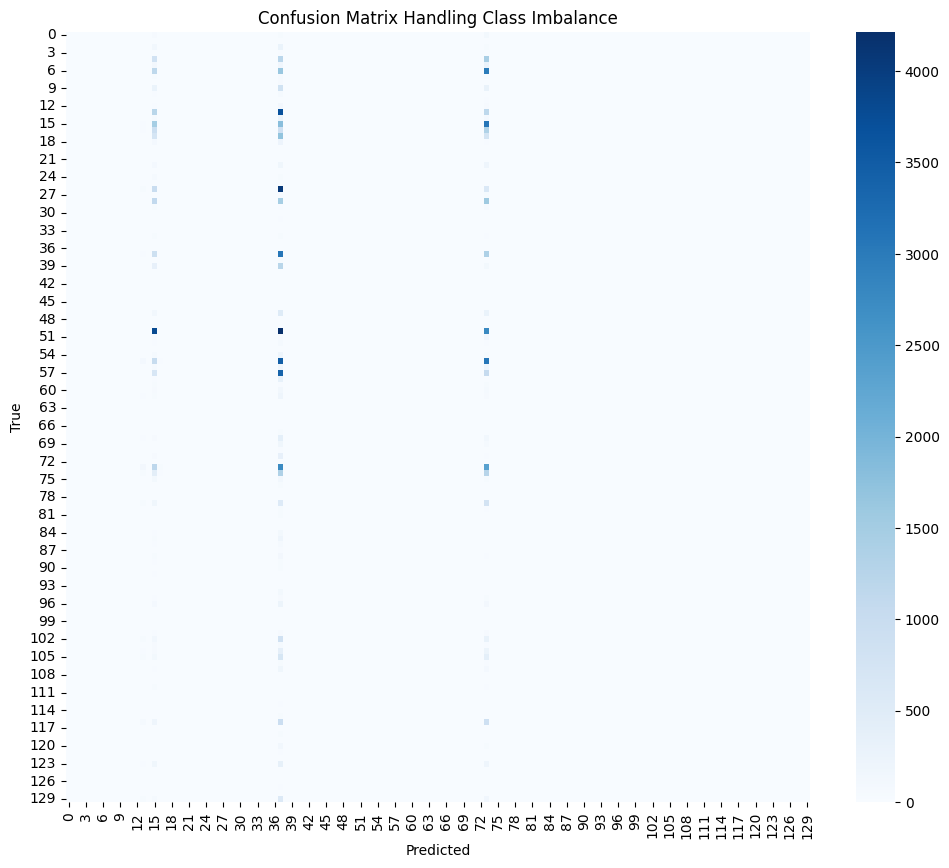

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", fmt='g')
plt.title("Confusion Matrix Handling Class Imbalance")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### ROC Curve

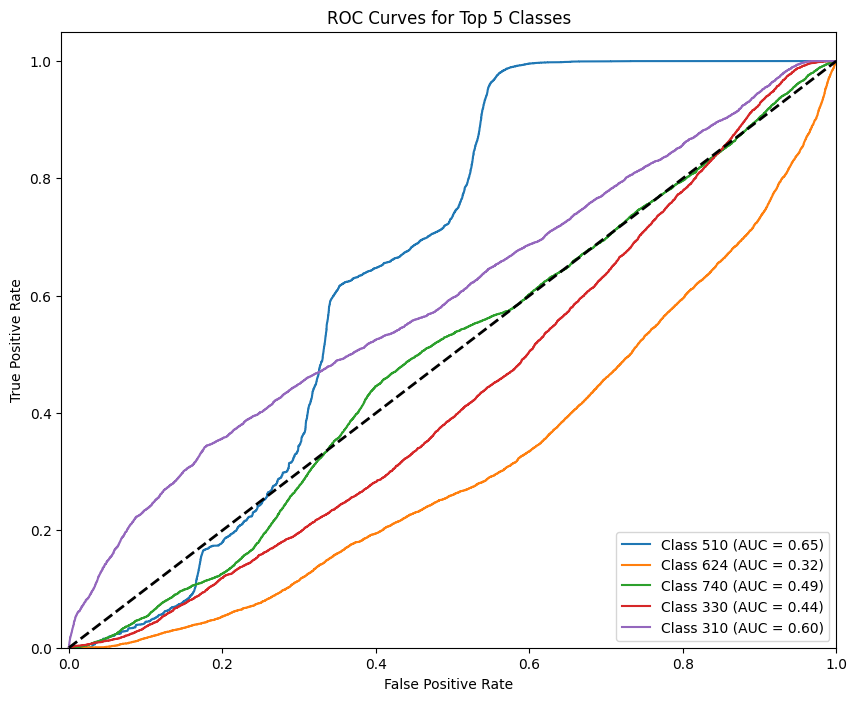

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels for ROC computation
y_true = y_test_tensor.cpu().numpy()
y_preds_probs = model(X_test_tensor).detach().cpu().numpy()
y_test_binarized = label_binarize(y_true, classes=np.arange(output_dim))

# Find Top 5 classes by frequency
top_classes = np.argsort(np.bincount(y_true))[-5:][::-1]

# Plot ROC curves
plt.figure(figsize=(10,8))

for class_idx in top_classes:
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_idx], y_preds_probs[:, class_idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {le.inverse_transform([class_idx])[0]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 5 Classes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
with torch.no_grad():
    train_preds = model(X_train_tensor).argmax(dim=1)
    train_acc = (train_preds == y_train_tensor).float().mean().item()
    test_preds = model(X_test_tensor).argmax(dim=1)
    test_acc = (test_preds == y_test_tensor).float().mean().item()

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.0681
Test Accuracy: 0.0690


In [ ]:
import time

# Measure inference time
start_time = time.time()
with torch.no_grad():
    y_probs = torch.softmax(model(X_test_tensor), dim=1).cpu().numpy()
    y_preds = np.argmax(y_probs, axis=1)
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

Inference Time: 0.2350 seconds


### Bootstrap Confidence Interval:

In [ ]:
from sklearn.metrics import f1_score

boot_f1s = []
for _ in range(100):
    indices = np.random.choice(len(X_test_tensor), len(X_test_tensor), replace=True)
    y_sample = y_test_tensor[indices]
    y_pred_sample = y_test_preds[indices]
    score = f1_score(y_sample.cpu(), y_pred_sample.cpu(), average='weighted')
    boot_f1s.append(score)

print(f"95% CI for F1: {np.percentile(boot_f1s, 2.5):.4f} - {np.percentile(boot_f1s, 97.5):.4f}")

95% CI for F1: 0.0209 - 0.0221
